# 1  Project: Investigating Airplane crashes Dataset (Team Vispy)
##    1.1  Table of Contents
    
### Introduction
### Data Wrangling
### Exploratory Data Analysis
### Conclusions



## 1.2  Introduction
### This data set contains information about airplane crashes collected from kaggle website data collections, including fatalities,aboard,date,time,operators.

### In this first step, I’ll import the necessary libraries to import the data. After that, I’ll perform some basic commands to understand the structure of the data.

### This analysis looks at two major questions;

### How many plane crashes yearly?
### How many people were on board?
### How many survivors were recorded?

In [2]:
#importing numpy and pandas libraries to read the data
import pandas as pd
import numpy as np

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as sts

In [3]:
## Data Wrangling

##> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for my analysis. 



In [4]:
Aircrash_data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
Aircrash_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [5]:
#Some summary statistics for the dataset
#Using describe, I’ll see whether there is any sudden jump in the data’s values.
Aircrash_data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [6]:
# see summary of Categorical columns
Aircrash_data.describe(include=['O'])

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Summary
count,5268,3049,5248,5250,1069,3562,5241,4933,4040,4878
unique,4753,1005,4303,2476,724,3244,2446,4905,3707,4673
top,09/11/2001,15:00,"Sao Paulo, Brazil",Aeroflot,-,Training,Douglas DC-3,49,178,Crashed during takeoff.
freq,4,32,15,179,67,81,334,3,6,15


In [7]:
#Info on the dataset.
#Using the info to see whether there are any null values in the data. so I can manipulate the data and drop what we will not be using.

Aircrash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [8]:
Aircrash_data.shape

(5268, 13)

In [9]:
#looking for missing values
Aircrash_data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [10]:
# We clean the data by filling empty values of fatalities, aboard and ground with 0

Aircrash_data['Fatalities'].fillna(0, inplace = True)
Aircrash_data['Aboard'].fillna(0, inplace = True)
Aircrash_data['Ground'].fillna(0, inplace = True)

In [11]:
# We clean the 'Date' column into a more usable and familiar form

Aircrash_data['Date'] = pd.to_datetime(Aircrash_data['Date'])
Aircrash_data['Date'] = Aircrash_data['Date'].dt.strftime("%m/%d/%Y")
Aircrash_data['Date'].head(5)

0    09/17/1908
1    07/12/1912
2    08/06/1913
3    09/09/1913
4    10/17/1913
Name: Date, dtype: object

In [12]:
# A separate column for 'Year' is created keeping in mind future analysis

Aircrash_data['Year'] = pd.DatetimeIndex(Aircrash_data['Date']).year
Aircrash_data['Year'].head(5)

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

In [13]:
# We create a column 'Survived' to find number of survivors

Aircrash_data['Survived'] = Aircrash_data['Aboard'] - Aircrash_data['Fatalities']
Aircrash_data['Survived'].fillna(0, inplace = True)

In [14]:
Aircrash_data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0


In [15]:
#Exploratory Data Analysis

##> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


In [16]:
# Total crashes per year

total_crashes_year = Aircrash_data[['Year', 'Date']].groupby('Year').count()
total_crashes_year = total_crashes_year.reset_index()
total_crashes_year.columns = ['Year', 'Crashes']


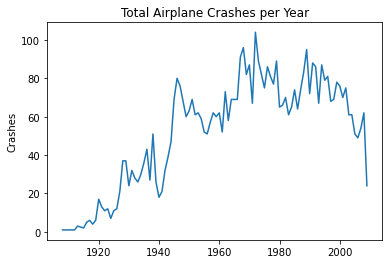

In [17]:
sns.lineplot(x = 'Year', y = 'Crashes', data = total_crashes_year)
plt.title('Total Airplane Crashes per Year')
plt.xlabel('')
plt.show()

In [18]:
# Total number of fatalities by crashes

pcdeaths_year = Aircrash_data[['Year', 'Fatalities']].groupby('Year').sum()
pcdeaths_year.reset_index(inplace = True)

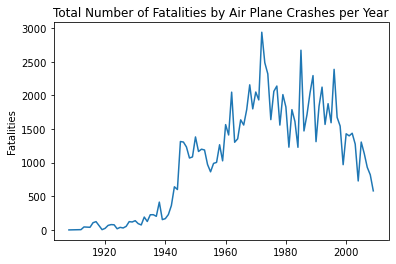

In [19]:
sns.lineplot(x = 'Year', y = 'Fatalities', data = pcdeaths_year)
plt.title('Total Number of Fatalities by Air Plane Crashes per Year')
plt.xlabel('')
plt.show()

In [20]:
# Total number of people aboard planes that crashed

abrd_per_year = Aircrash_data[['Year', 'Aboard']].groupby('Year').sum()
abrd_per_year = abrd_per_year.reset_index()

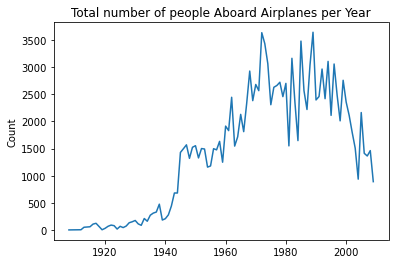

In [21]:
sns.lineplot(x = 'Year', y = 'Aboard', data = abrd_per_year)
plt.title('Total number of people Aboard Airplanes per Year')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [22]:
# Correlation between number of people aboard and number of fatalities

a = sts.pearsonr(Aircrash_data.Fatalities, Aircrash_data.Aboard)
b = sts.spearmanr(Aircrash_data.Fatalities, Aircrash_data.Aboard)
print ('Pearson Correlation constant : ',a[0],'\nSpearman Correlation constant : ',b[0])

Pearson Correlation constant :  0.7569242287226605 
Spearman Correlation constant :  0.7729747858599402


In [23]:
# Yearly view of Fatalities, Survived, Killed on ground

FSG_per_year = Aircrash_data[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()
FSG_per_year = FSG_per_year.reset_index()

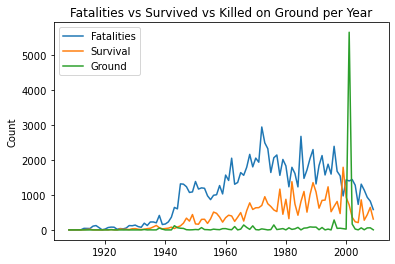

In [24]:
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year)
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')
plt.show()

In [25]:
#Spike in ground casualties. After further investigation, we find it to be the dreaded 9/11 disaster, when two planes were hijacked and crashed into the Twin Towers.

Aircrash_data[Aircrash_data['Ground'] == Aircrash_data['Ground'].max()]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
4803,09/11/2001,08:47,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,0.0
4804,09/11/2001,09:03,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,0.0


In [26]:
# Creating a column to check if plane was a military one

df = Aircrash_data
df['Operator'] = df['Operator'].str.lower()

In [27]:
df['Military'] = df['Operator'].str.contains('military')

In [28]:
df.groupby(['Military']).count()['Date']

Military
False    4469
True      781
Name: Date, dtype: int64

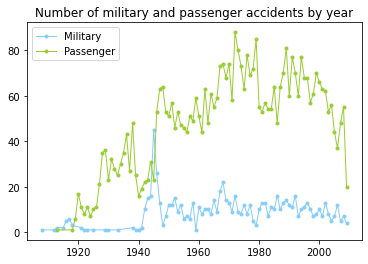

In [29]:
# Number of military and passenger accidents by year

dfm = df[df['Military'] == True]
dfp = df[df['Military'] == False]

dfm = pd.DataFrame(dfm.groupby('Year').count()['Date'])
dfm.sort_values('Year',inplace=True)
dfm.reset_index(inplace = True)
dfm.columns = ['Year','Military']

dfp = pd.DataFrame(dfp.groupby('Year').count()['Date'])
dfp.sort_values('Year',inplace=True)
dfp.reset_index(inplace = True)
dfp.columns = ['Year','Passenger']

plt.plot(dfm['Year'], dfm['Military'], label = 'Military', color='lightskyblue', marker = ".", linewidth=1)
plt.plot(dfp['Year'], dfp['Passenger'], label = 'Passenger', color='yellowgreen', marker = ".", linewidth=1)
plt.legend()
plt.title('Number of military and passenger accidents by year')
plt.show()

Operator Analysis

In [30]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Military
0,09/17/1908,17:18,"Fort Myer, Virginia",military - u.s. army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,True
1,07/12/1912,06:30,"AtlantiCity, New Jersey",military - u.s. navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0,True
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0,False
3,09/09/1913,18:30,Over the North Sea,military - german navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0,True
4,10/17/1913,10:30,"Near Johannisthal, Germany",military - german navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0,True


In [31]:
# We aim to find which were the most unreliable operators

df['Operator'] = df['Operator'].str.upper()

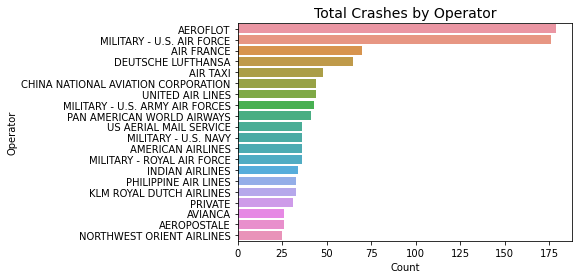

In [32]:
# Most crashes by operator

op = df.groupby('Operator')[['Operator']].count()
op.rename(columns = {"Operator" : "Count"}, inplace= True)
op = op.sort_values('Count', ascending = False).head(20)

sns.barplot (y = op.index, x = "Count", data = op, orient='h')
plt.title('Total Crashes by Operator', loc='Center', fontsize=14)
plt.show()

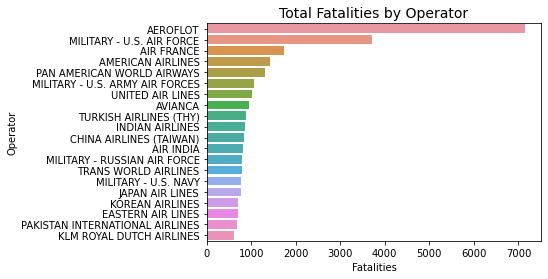

In [33]:
# Most fatalities by operator

op = df.groupby('Operator').sum() ['Fatalities']
op = op.sort_values(ascending = False)
op = pd.DataFrame (data = op.head(20))

sns.barplot (y = op.index, x = "Fatalities", data = op, orient='h')
plt.title('Total Fatalities by Operator', loc='Center', fontsize=14)
plt.show()

In [34]:
# As we can see, both lists are headed by Aeroflot

#### Locations with highest average of fatalities

In [35]:
#  Check relative occurence of crash in locations
by_location = df.groupby('Location').mean()
by_location.reset_index(inplace= True)
by_location

,Location,Aboard,Fatalities,Ground,Year,Survived
0,"1,200 miles off Dakar, AtlantiOcean",52.000000,52.0,0.0,1948.000000,0.000000
1,"100 miles SW of Kuujjuaq, Quebec, Canada",2.000000,2.0,0.0,1997.000000,0.000000
2,"110 miles SW of Sochi, Russia",78.000000,78.0,0.0,2001.000000,0.000000
3,"200 miles NE of Derby, Australia",4.000000,4.0,0.0,2003.000000,0.000000
4,"25 nm off Agrigento, Italy",26.000000,26.0,0.0,1953.000000,0.000000
...,...,...,...,...,...,...
4298,"Zheng Zou AB, China",16.000000,16.0,6.0,2001.000000,0.000000
4299,"Zifta, Egypt",4.000000,4.0,0.0,1968.000000,0.000000
4300,"Zurich, Switzerland",25.166667,17.5,0.0,1968.833333,7.666667
4301,"Zwingle, Iowa",8.000000,8.0,0.0,1993.000000,0.000000


In [36]:
by_location = by_location[by_location['Fatalities'] > 300]

Text(0.5, 1.0, 'Locations with the highest average fatalities')

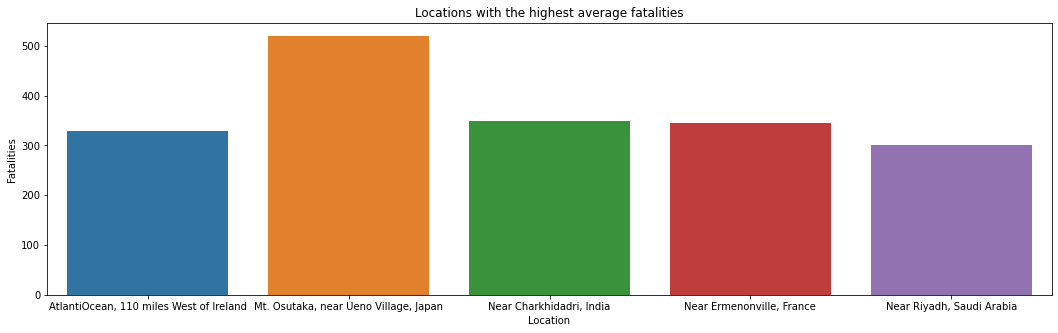

In [37]:
plt.figure(figsize= (18,5))
sns.barplot(by_location['Location'],by_location['Fatalities'])
plt.title('Locations with the highest average fatalities')

#### Locations with highest count of crashes

In [38]:
#  Check relative occurence of crash in locations
by_location = df.groupby('Location')
occurence = by_location['Location'].count().to_frame()
occurence.rename(columns= {'Location':'count'}, inplace= True)
occurence.reset_index(inplace= True)
occurence

,Location,count
0,"1,200 miles off Dakar, AtlantiOcean",1
1,"100 miles SW of Kuujjuaq, Quebec, Canada",1
2,"110 miles SW of Sochi, Russia",1
3,"200 miles NE of Derby, Australia",1
4,"25 nm off Agrigento, Italy",1
...,...,...
4298,"Zheng Zou AB, China",1
4299,"Zifta, Egypt",1
4300,"Zurich, Switzerland",6
4301,"Zwingle, Iowa",1


In [39]:
occurence['count'].value_counts()

1     3839
2      267
3      101
4       37
5       20
6       15
7        7
8        5
13       3
9        3
12       2
15       2
11       1
14       1
Name: count, dtype: int64

In [40]:
occurence = occurence[occurence['count'] > 10]

Text(0.5, 1.0, 'Locations with higher number of crash')

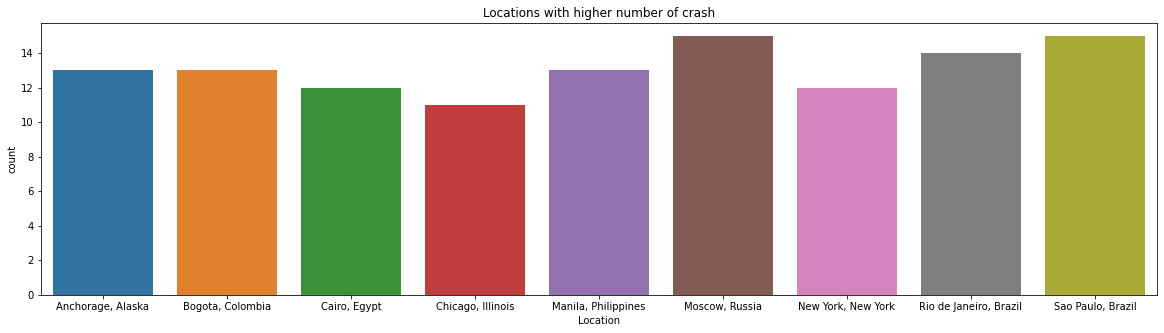

In [41]:
plt.figure(figsize= (20,5))
sns.barplot(occurence['Location'],occurence['count']);
plt.title('Locations with higher number of crash')

#### Route with highest count of crashes

In [42]:
# based on route
by_route = df.groupby('Route')
route = by_route['Route'].count().to_frame()
route.rename(columns= {'Route':'count'}, inplace= True)
route.reset_index(inplace= True)
route

,Route,count
0,- Tegucigalpa - Toncontin,1
1,"AZ - Las Vegas, NV",1
2,Abaco - Miami,1
3,Abadan - Tehran,1
4,Abakan - Petropavlosk - Kamchatsky,1
...,...,...
3239,Zurich - Rabat,1
3240,Zurich - Rome,1
3241,Zurich - Tel Aviv,1
3242,Zürich - Dresden,1


In [43]:
route['count'].value_counts()

1     3086
2      125
3       24
4        4
5        1
29       1
6        1
17       1
81       1
Name: count, dtype: int64

In [44]:
route = route[route['count'] > 4]
route

,Route,count
2711,Sao Paulo - Rio de Janeiro,5
2790,Sightseeing,29
2978,Test,6
2979,Test flight,17
3029,Training,81


Text(0.5, 1.0, 'Routes wiith the highest number of crash')

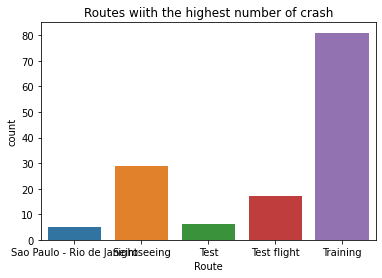

In [45]:
#plt.figure(figsize= (20,5))
sns.barplot(route['Route'],route['count'])
plt.title('Routes wiith the highest number of crash')

### Text Clustering with KMeans

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In the 'Summary' column, we have NaN values as well, so we're going to create a new dataframe with the 'Summary' data and dropping all rows with NaN values.

In [47]:
text_data = df['Summary'].dropna()
text_data = pd.DataFrame(text_data)

KMeans normally works with numbers only: we need to have numbers.To get numbers, we do feature extraction.

The feature we’ll use is TF-IDF, a numerical statistic. This statistic uses term frequency and inverse document frequency. The method TfidfVectorizer() implements the TF-IDF algorithm.

In [48]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

### Model Fitting

In [85]:
model = MiniBatchKMeans(n_clusters=5, random_state=5)
model.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=5)

In [86]:
model.cluster_centers_

array([[0.00000000e+00, 9.53792133e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.25247859e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.78464194e-04, 4.29485393e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.23894989e-03, 7.89615876e-05, ...,
        1.89383101e-04, 2.21404211e-04, 1.21739371e-04],
       [0.00000000e+00, 1.12049143e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [87]:
# predict cluster labels for new dataset
model.predict(X)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
model.labels_

array([3, 3, 3, ..., 3, 3, 2])

In [88]:
print ('Most Common Terms per Cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

for i in range(5):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
plane
cargo
mountain
crashed
attempting
struck
land
engine
flew
mail


Cluster 1:
weather
conditions
poor
vfr
adverse
flight
crashed
continued
mountain
pilot


Cluster 2:
en
route
crashed
takeoff
sea
mountain
disappeared
engine
mountains
plane


Cluster 3:
crashed
aircraft
approach
runway
pilot
landing
engine
plane
failure
flight


Cluster 4:
taking
shortly
shot
crashed
plane
aircraft
engine
minutes
air
rebels
